In [ ]:
#clone repository
!git clone https://github.com/jaimesabalimperial/jaisalab.git
%cd jaisalab/ 

In [ ]:
# Install pip packages in the current Jupyter kernel
import sys
!{sys.executable} -m pip install -r env/requirements.txt

In [2]:
from jaisalab.evaluation.plotter import RLPlotter
from jaisalab.utils.eval import get_snapshot_dirs
from os import listdir

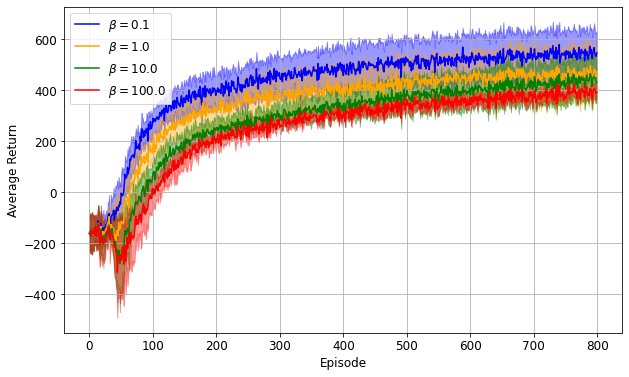

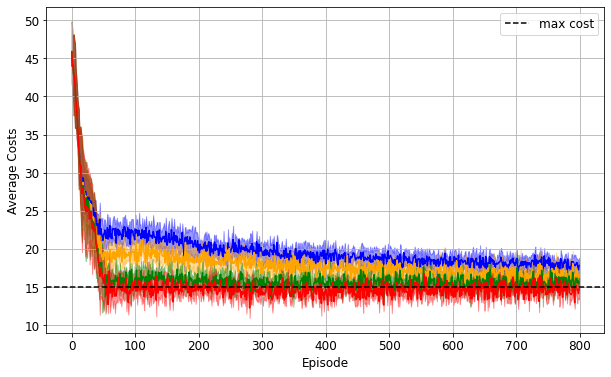

In [57]:
dirs = ['data1/', 'data2/', 'data3/', 'data4/', 'data5/', 'data6/', 'data7/', 'data9/']
dcpo_dirs = ['data1/']
beta_dirs = ['data1/', 'data2/', 'data3/', 'data4/', 'data5/']

fdirs = ['trpo_backlog', 'saute_trpo_backlog', 'cpo_backlog', 'dcpo_beta100.0_backlog']
dcpo_fdirs = [ 'dcpo_beta0.1_backlog', 'dcpo_beta1.0_backlog','dcpo_beta10.0_backlog', 'dcpo_beta100.0_backlog']
#'dcpo_beta1.0_backlog_1'
#RLPotter automatically calculates the mean and std of the recorded data 
#across all the replications of the specified experiments found in the list
#of data dirs
labels = [r'$\beta = 0.1$', r'$\beta = 1.0$', r'$\beta = 10.0$', r'$\beta = 100.0$']
plotter1 = RLPlotter(fdir=fdirs, data_dir=beta_dirs)
plotter1.plot_returns(figsize=(10,6), fontsize=12, custom_labels=labels)
plotter1.plot_costs(cost_lim=15, use_legend=False, figsize=(10,6), fontsize=12)

In [ ]:
data_dirs = ['ablation/'+dir for dir in listdir('ablation')]
dir2 = 'ablation/data10'

fdirs = ['dcpo_ablation_backlog',  'cpo_backlog', 'trpo_backlog', 'saute_trpo_backlog']
plotter = RLPlotter(fdir=fdirs, data_dir=dir2)
plotter.plot_returns()
plotter.plot_costs(use_legend=True)

In [ ]:
#check the average final training costs for all experiments
for k, v in plotter.data.items():
    print(k)
    print(v['Evaluation/AverageSafetyReturn'][-1])
    print('\n')

In [18]:
from jaisalab.evaluation import Evaluator
from jaisalab.utils.eval import get_snapshot_dirs

In [ ]:
snapshot_dirs = get_snapshot_dirs('data/data10/')

violation_rates = {}
for snapshot in snapshot_dirs:
    evaluator = Evaluator(snapshot)
    epochs = evaluator.rollout(n_epochs=30)

In [10]:
print(violation_rates)

{'saute_trpo_backlog': 10.56, 'dcpo_backlog': 18.074285714285715, 'cpo_backlog': 19.251428571428573, 'trpo_backlog': 33.83714285714286}
